In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv(r"C:\MY\IIT_Jammu\FINAL_PROJECT\archive\Crop_recommendation.csv")

In [12]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()

rf.fit(X_train, y_train)
dt.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
def evaluate(model, name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Random Forest Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00     

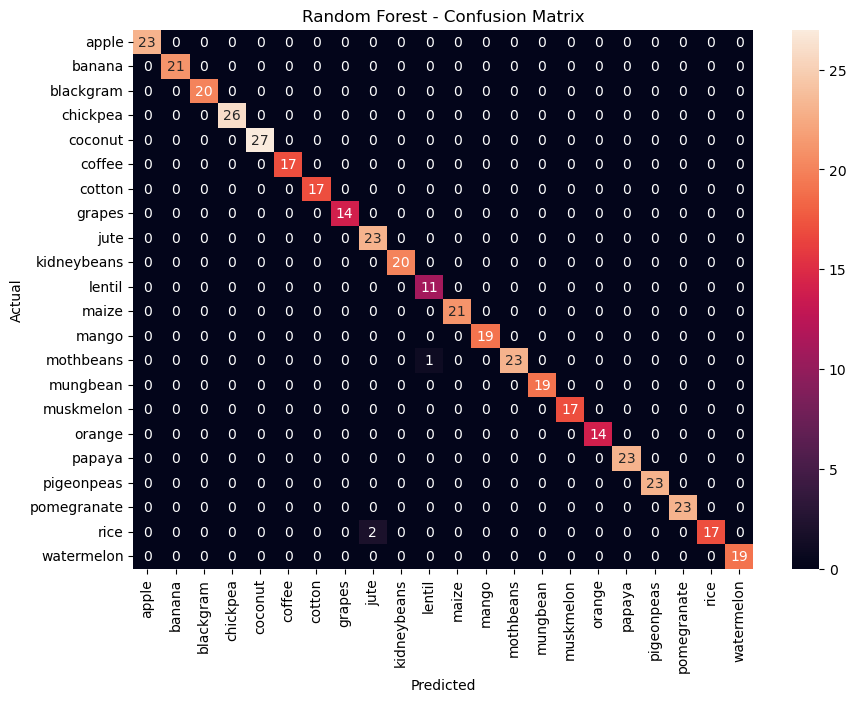


Decision Tree Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.91      0.87      0.89        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       0.93     

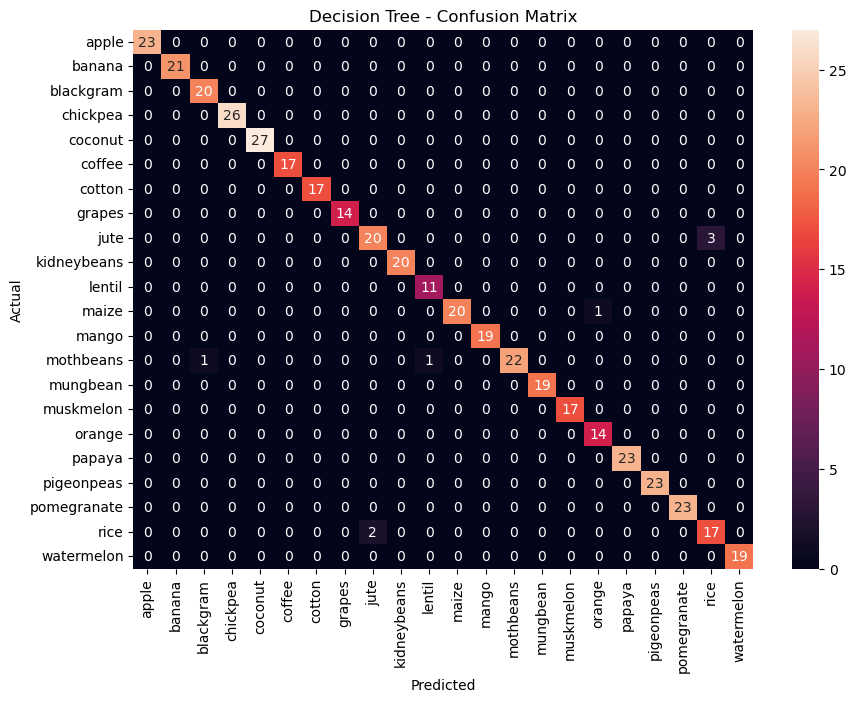


K-Nearest Neighbors Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      0.94      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.76      0.96      0.85        23
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.85      1.00      0.92        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.0

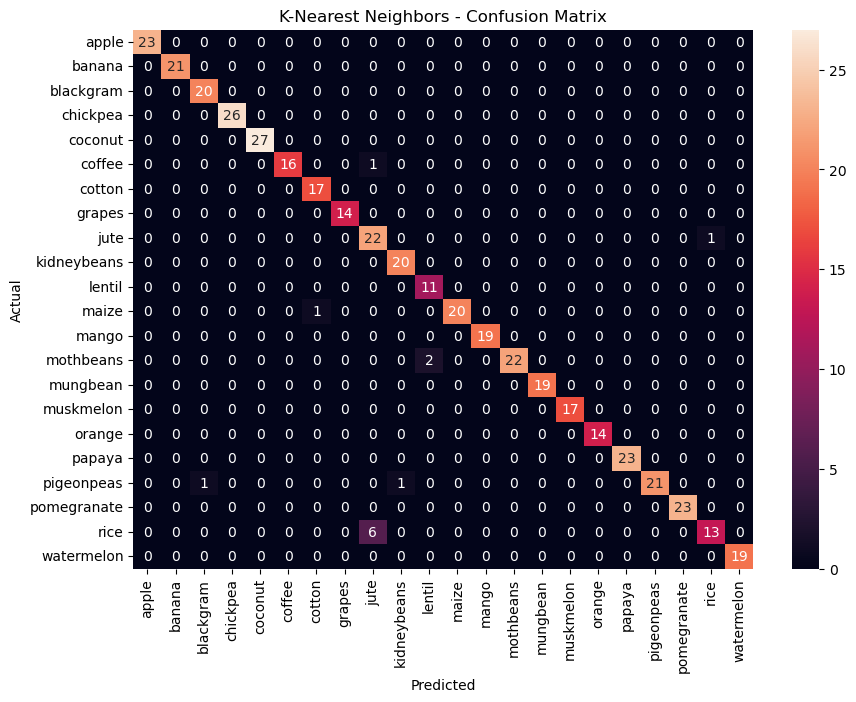

In [15]:
evaluate(rf, "Random Forest")
evaluate(dt, "Decision Tree")
evaluate(knn, "K-Nearest Neighbors")

In [16]:
def get_user_input():
    print("\n🌱 Enter the environmental parameters:")
    N = float(input("Nitrogen content (N): "))
    P = float(input("Phosphorus content (P): "))
    K = float(input("Potassium content (K): "))
    temperature = float(input("Temperature (°C): "))
    humidity = float(input("Humidity (%): "))
    ph = float(input("pH value: "))
    rainfall = float(input("Rainfall (mm): "))
    return [N, P, K, temperature, humidity, ph, rainfall]

In [17]:
def predict_crop(model, input_data):
    input_df = pd.DataFrame([input_data], columns=X.columns)  # Use same columns as training
    prediction = model.predict(input_df)
    crop = le.inverse_transform(prediction)[0]
    print(f"\n✅ Recommended Crop to Grow: {crop}")

In [18]:
user_input = get_user_input()
predict_crop(rf, user_input)


🌱 Enter the environmental parameters:


Nitrogen content (N):  120
Phosphorus content (P):  58
Potassium content (K):  60
Temperature (°C):  27.0
Humidity (%):  90.0
pH value:  6.3
Rainfall (mm):  300.0



✅ Recommended Crop to Grow: papaya


In [19]:
import joblib

joblib.dump(rf, 'crop_model.pkl')

joblib.dump(le, 'label_encoder.pkl')

print("✅ Model and label encoder saved successfully.")


✅ Model and label encoder saved successfully.


In [20]:
import joblib

joblib.dump(rf, r"C:\MY\IIT_Jammu\FINAL_PROJECT\crop_model.pkl")
joblib.dump(le, r"C:\MY\IIT_Jammu\FINAL_PROJECT\label_encoder.pkl")

print("✅ Model and LabelEncoder saved successfully in FINAL_PROJECT folder.")


✅ Model and LabelEncoder saved successfully in FINAL_PROJECT folder.
